In [1]:
from util import *
import matplotlib.pyplot as plt

In [2]:
m = 3
s = 5

# 1. Random Data Generator

In [3]:
for i in range(10):
    res = gaussian_data_generator(m, s)
    print(res)

1.5164330489906561
6.110776241995579
2.4329693507950085
2.532652197917443
8.035881147493878
4.1124158900087275
-0.247079395489465
1.7809221718232287
1.0516188301692762
4.347632086456462


# 2. Sequential Estimator

In [4]:
m_estimate = 0
s_estimate = 0
sum = 0
sumsq = 0
n = 0
print('Data point source function: N({},{})'.format(m,s))
while abs(m_estimate - m) > 0.1 or abs(s_estimate - s) > 0.1:
    point = gaussian_data_generator(m, s)
    n += 1
    sum += point
    sumsq += point**2
    m_estimate = sum / n
    if n > 1:
        s_estimate = (sumsq - sum**2 / n) / (n-1)
    print('Add data point: {}'.format(point))
    print('Mean={}  Variance={}'.format(m_estimate,s_estimate))
    print()


Data point source function: N(3,5)
Add data point: 5.257556845152578
Mean=5.257556845152578  Variance=0

Add data point: -0.8479099305047044
Mean=2.204823457323937  Variance=18.63836227432747

Add data point: 4.933150153046526
Mean=3.1142656892314666  Variance=11.800436656694584

Add data point: 2.47822422510324
Mean=2.95525532319941  Variance=7.968094957152317

Add data point: 2.611482113831836
Mean=2.886500681325895  Variance=5.999707221760016

Add data point: -1.131327550434733
Mean=2.2168626426991236  Variance=7.490256394063468

Add data point: 4.567082579281905
Mean=2.5526083479252355  Variance=7.030956578430678

Add data point: 3.369527135234145
Mean=2.654723196338849  Variance=6.1099537482157205

Add data point: 6.240735114224405
Mean=3.0531689649927998  Variance=6.775040804712891

Add data point: 3.291638830599898
Mean=3.0770159515535096  Variance=6.027945280758394

Add data point: 7.642006786141667
Mean=3.492015118334251  Variance=7.31961814539836

Add data point: 2.9231040689

# 3. Baysian Linear regression

In [29]:
b=1 #prior gaussian distribution's variance
n=3 #basis
a=3 #variance of N(0,a)
w=np.asarray([1, 2, 3]) #line parameters

In [30]:
NUM=1000
point_x=[]
point_y=[]

# after 10 points, after 50 points, final result
mean_list=[]
variance_list=[]

In [31]:
mean = np.zeros((n, 1))
variance = (1/b) * np.identity(n)
count = 0
eps = 1
while count <= NUM:
    point = polynomial_basis_generator(n, a, w)
    new_x = point[0]
    new_y = point[1]
    #point_x.append(new_x)
    #point_y.append(new_y)
    print('Add data point {}:'.format(point))
    print()
    X = np.asarray([math.pow(new_x,i) for i in range(n)])
    S = np.linalg.pinv(variance)
    X = X.reshape(1, -1)
    predicted_mean = mean.T.dot(X.T).item()
    
    predicted_variance = ((a) + X@variance@X.T).item()
    variance_new = np.linalg.pinv((1/a) * X.T@X + S)
    #print(variance_new.shape)
    #print((a * X.T * new_y + S@mean).shape)
    mean_new = variance_new@((1/a) * X.T * new_y + S@mean)
    
    print('Posterior mean:')
    print(mean_new)
    print()
    print('Posterior variance:')
    print(variance_new)
    print()

    print('Predictive distribution ~ N({:.5f},{:.5f})'.format(predicted_mean, predicted_variance))
    print('--------------------------------------------------')

    point_x.append(new_x)
    point_y.append(new_y)
    if count==10 or count==50 or count==NUM:
        mean_list.append(mean_new)
        variance_list.append(variance_new)

    mean=mean_new
    variance = variance_new
    count += 1


    

Add data point (0.2865396776793243, 1.8596071584619196):

Posterior mean:
[[0.45479998]
 [0.13031824]
 [0.03734135]]

Posterior variance:
[[ 0.75543223 -0.07007837 -0.02008023]
 [-0.07007837  0.97991977 -0.00575378]
 [-0.02008023 -0.00575378  0.99835131]]

Predictive distribution ~ N(0.00000,4.08885)
--------------------------------------------------
Add data point (0.12654407305915027, 3.2094685894634054):

Posterior mean:
[[0.99914075]
 [0.16958595]
 [0.03382446]]

Posterior variance:
[[ 0.60704922 -0.08078244 -0.01912156]
 [-0.08078244  0.9791476  -0.00568463]
 [-0.01912156 -0.00568463  0.99834512]]

Predictive distribution ~ N(0.47189,3.75298)
--------------------------------------------------
Add data point (0.09557468071071495, -0.03718738569583957):

Posterior mean:
[[0.82392745]
 [0.16585818]
 [0.03690832]]

Posterior variance:
[[ 0.50733873 -0.08290384 -0.01736659]
 [-0.08290384  0.97910246 -0.00564729]
 [-0.01736659 -0.00564729  0.99831423]]

Predictive distribution ~ N(1.015

In [32]:
def plot(num_points,x,mean,variance,title):
    mean_predict=np.zeros(500)
    variance_predict=np.zeros(500)
    for i in range(len(x)):
        X=np.asarray([math.pow(x[i],k) for k in range(n)]).reshape(1, -1)
        mean_predict[i]=(mean.T@X.T).item()
        variance_predict[i] = ((a) + X@variance@X.T).item()
        
    plt.plot(point_x[:num_points],point_y[:num_points],'bo')
    plt.plot(x,mean_predict,'k-')
    plt.plot(x,mean_predict+variance_predict,'r-')
    plt.plot(x,mean_predict-variance_predict,'r-')
    plt.xlim(-2,2)
    plt.ylim(-15,25)
    plt.title(title)
    plt.show()

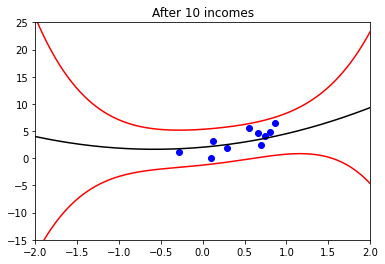

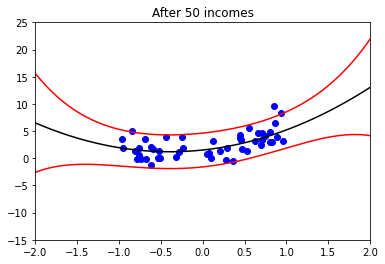

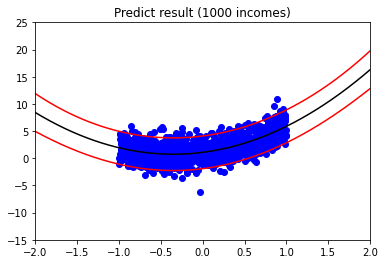

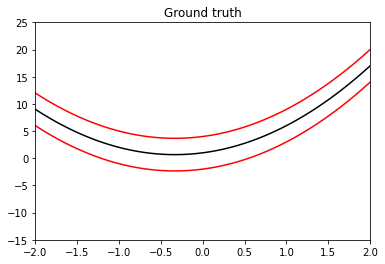

In [33]:
x=np.linspace(-2,2,500)
plot(10,x,mean_list[0],variance_list[0],'After 10 incomes')
plot(50,x,mean_list[1],variance_list[1],'After 50 incomes')
plot(NUM,x,mean_list[2],variance_list[2],'Predict result (1000 incomes)')
plot(0,x,w,np.zeros((n,n)),'Ground truth')